#  <font color = 'blue'> Data Modeling

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
# Load bank_mkt_important_features.csv csv file
bank_mkt = pd.read_csv('dt_top14_imp_features.csv')

In [3]:
bank_mkt.shape

(41188, 15)

In [4]:
# View the first 5 rows of the data frame
bank_mkt.head(5)

,duration,month,contacted_previous_campaign,day_of_week,age,campaign,method_of_contact,housingyes,loanyes,maritalmarried,educationhigh.school,educationuniversity.degree,maritalsingle,jobtechnician,subscription
0,2,3,0,1,5,0,1,0,0,1,0,0,0,0,0
1,1,3,0,1,5,0,1,0,0,1,1,0,0,0,0
2,2,3,0,1,3,0,1,1,0,1,1,0,0,0,0
3,2,3,0,1,3,0,1,0,0,1,0,0,0,0,0
4,3,3,0,1,5,0,1,0,1,1,1,0,0,0,0


In [ ]:
# Check the structure of the dataset
# bank_mkt.info()

In [ ]:
# Check for missing values in the dataset
# bank_mkt.isna().sum()

In [5]:
# Subset predictor variables and store them in X
X = bank_mkt.iloc[:,0:14]
X.shape

(41188, 14)

In [6]:
# Subset target variable and store it in y
y = bank_mkt.loc[:,'subscription']
y.shape

(41188,)

### <font color = 'blue'> Data Splitting

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# View the first 5 rows of X_train
X_train.head()

,duration,month,contacted_previous_campaign,day_of_week,age,campaign,method_of_contact,housingyes,loanyes,maritalmarried,educationhigh.school,educationuniversity.degree,maritalsingle,jobtechnician
39075,1,10,0,1,2,1,0,0,0,1,0,1,0,0
34855,1,3,0,5,2,1,1,0,0,0,0,1,1,1
7107,3,3,0,4,3,1,1,1,0,1,0,0,0,0
31614,1,3,0,4,2,0,0,0,0,1,0,1,0,0
34878,3,3,0,5,2,1,0,0,0,0,1,0,1,0


In [9]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28831, 14)
y_train shape: (28831,)
X_test shape: (12357, 14)
y_test shape: (12357,)


### <font color = 'blue'> Handling Unbalanced Data: Random Oversampling

This technique involves randomly duplicating samples from the minority class to balance the number of samples in each class. 

In [21]:
# Create a random oversampler object
# oversampler = RandomOverSampler(random_state=42)

In [22]:
# Resample the training data
# X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [23]:
# Print the class distribution before and after oversampling
# print("Before oversampling:", Counter(y_train))
# print("After oversampling:", Counter(y_resampled))

Before oversampling: Counter({0: 25580, 1: 3251})
After oversampling: Counter({0: 25580, 1: 25580})


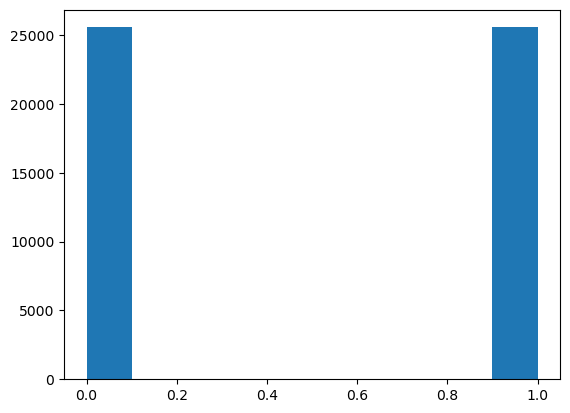

In [24]:
# # Plot a bar chart to visualize the target variable after random oversampling
# plt.hist(y_resampled);

### <font color = 'blue'> Handling Unbalanced Data: SMOTE

Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The component works by generating new instances from existing minority cases that you supply as input. 

In [15]:
# Create a smote object
# smote = SMOTE(random_state=42)
# Resample the training data
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [16]:
# Print the class distribution before and after oversampling
# print("Before oversampling:", Counter(y_train))
# print("After oversampling:", Counter(y_resampled))

Before oversampling: Counter({0: 25580, 1: 3251})
After oversampling: Counter({0: 25580, 1: 25580})


In [ ]:
# Plot a bar chart to visualize the target variable after random oversampling
# plt.hist(y_resampled);

### <font color="blue"> Random Forest

In [25]:
# Create a Random Forest classifier object
rf_classifier = RandomForestClassifier()

In [26]:
# Train the classifier on the training data
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [27]:
# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

In [28]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[9750 1218]
 [ 729  660]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10968
           1       0.35      0.48      0.40      1389

    accuracy                           0.84     12357
   macro avg       0.64      0.68      0.66     12357
weighted avg       0.87      0.84      0.85     12357



In [29]:
# Calculate Sensitivity, Specificity, Precision, Gmean, Accuracy, and AUC
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
precision = tp / (tp + fp)
gmean = np.sqrt(sensitivity * specificity)
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Gmean:", gmean)
print("Accuracy:", accuracy)
print("AUC:", auc)

Sensitivity: 0.47516198704103674
Specificity: 0.8889496717724289
Precision: 0.3514376996805112
Gmean: 0.6499192968506664
Accuracy: 0.8424374848264142
AUC: 0.6820558294067328
